In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
LD = ExperimentClass.Experiment("20240603_NPQ_effect_day_cycle", "SpeedZen")
LL = ExperimentClass.Experiment("20240605_NPQ_effect_day_cycle", "SpeedZen")

times_LD = [5, 8.5, 11.5]
times_LL = [5, 7.5, 9.5]

In [3]:
for manip in [LD, LL]:
    normalising_vector = []
    for col in manip.Data.columns:
        normalising_vector.append(manip.Data[col][6])
    manip.Data = manip.Data.div(normalising_vector, axis=1)



In [4]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax


In [5]:
time_Fstat_LD = []
time_Fmax_LD = []
Fstat_LD = []
Fmax_LD = []
Phi_PSII_LD = []
NPQ_LD = []
for recor in LD.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(LD.Time, LD.Data[f"E{recor}"])
    time_Fstat_LD.append(aux_time_Fstat.values)
    Fstat_LD.append(aux_Fstat.values)
    time_Fmax_LD.append(aux_time_Fmax.values)
    Fmax_LD.append(aux_Fmax.values)
    Phi_PSII_LD.append((Fmax_LD[-1]-Fstat_LD[-1])/Fmax_LD[-1])
    NPQ_LD.append((Fmax_LD[-1][0]-Fmax_LD[-1])/Fmax_LD[-1])

time_Fstat_LD = np.array(time_Fstat_LD)
time_Fmax_LD = np.array(time_Fmax_LD)
Fstat_LD = np.array(Fstat_LD)
Fmax_LD = np.array(Fmax_LD)
Phi_PSII_LD = np.array(Phi_PSII_LD)
NPQ_LD = np.array(NPQ_LD)


In [6]:
time_Fstat_LL = []
time_Fmax_LL = []
Fstat_LL = []
Fmax_LL = []
Phi_PSII_LL = []
NPQ_LL = []
for recor in LL.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(LL.Time, LL.Data[f"E{recor}"])
    time_Fstat_LL.append(aux_time_Fstat.values)
    Fstat_LL.append(aux_Fstat.values)
    time_Fmax_LL.append(aux_time_Fmax.values)
    Fmax_LL.append(aux_Fmax.values)
    Phi_PSII_LL.append((Fmax_LL[-1]-Fstat_LL[-1])/Fmax_LL[-1])
    NPQ_LL.append((Fmax_LL[-1][0]-Fmax_LL[-1])/Fmax_LL[-1])

time_Fstat_LL = np.array(time_Fstat_LL)
time_Fmax_LL = np.array(time_Fmax_LL)
Fstat_LL = np.array(Fstat_LL)
Fmax_LL = np.array(Fmax_LL)
Phi_PSII_LL = np.array(Phi_PSII_LL)
NPQ_LL = np.array(NPQ_LL)

In [7]:
LL.fig_folder

'C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/SpeedZen/20240605_NPQ_effect_day_cycle/Figures'

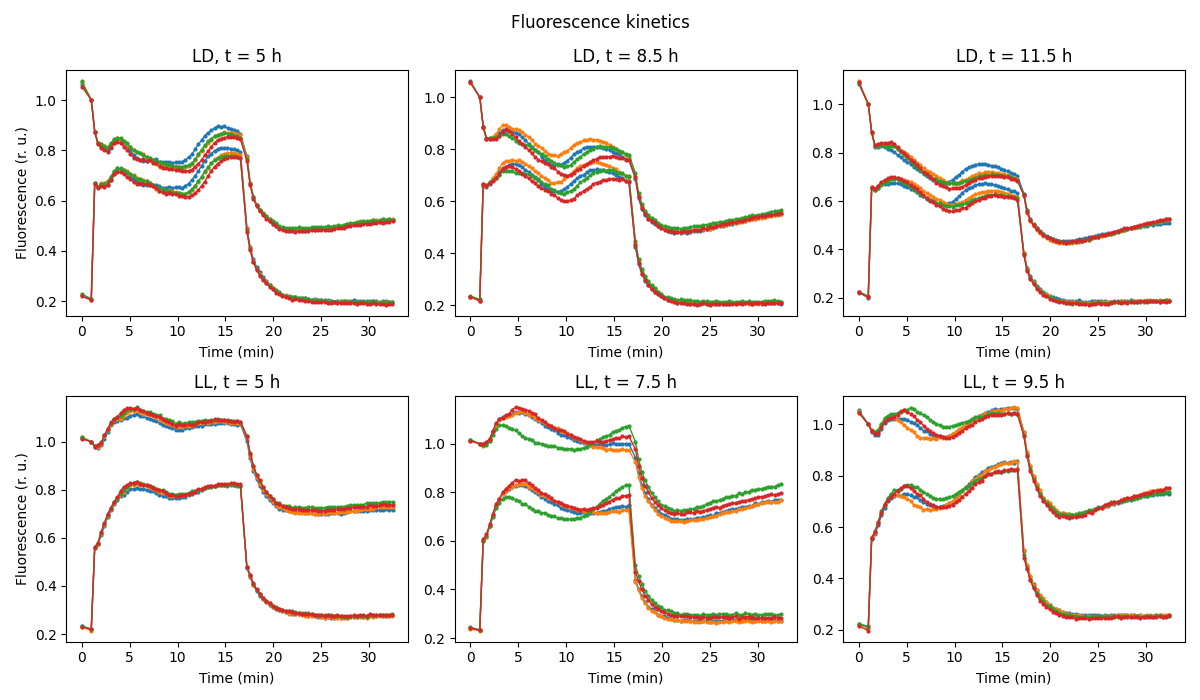

In [8]:
line = 1
markers = 2

fig, ax = plt.subplots(2,3, figsize=(12,7))
fig.suptitle("Fluorescence kinetics")
for i, record in enumerate(manip.annotations.E):
    if manip.annotations.iloc[i].Point == 1:
        ax[0,0].plot(time_Fstat_LD[i], Fstat_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
        ax[0,0].plot(time_Fmax_LD[i], Fmax_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 2:
        ax[0,1].plot(time_Fstat_LD[i], Fstat_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
        ax[0,1].plot(time_Fmax_LD[i], Fmax_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 3:
        ax[0,2].plot(time_Fstat_LD[i], Fstat_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
        ax[0,2].plot(time_Fmax_LD[i], Fmax_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")

for i, ax_ in enumerate(ax[0,:]):
    ax_.set_xlabel("Time (min)")
    ax_.set_title(f"LD, t = {times_LD[i]} h")
    
ax[0, 0].set_ylabel("Fluorescence (r. u.)")

for i, record in enumerate(manip.annotations.E):
    if manip.annotations.iloc[i].Point == 1:
        ax[1, 0].plot(time_Fstat_LL[i], Fstat_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
        ax[1, 0].plot(time_Fmax_LL[i], Fmax_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 2:
        ax[1, 1].plot(time_Fstat_LL[i], Fstat_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
        ax[1, 1].plot(time_Fmax_LL[i], Fmax_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 3:
        ax[1, 2].plot(time_Fstat_LL[i], Fstat_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
        ax[1, 2].plot(time_Fmax_LL[i], Fmax_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")

for i, ax_ in enumerate(ax[1,:]):
    ax_.set_xlabel("Time (min)")
    ax_.set_title(f"LL, t = {times_LL[i]} h")
    
ax[1, 0].set_ylabel("Fluorescence (r. u.)")

fig.tight_layout()

fig.savefig(LL.fig_folder + "/Fluorescence_kinetics.png", dpi=300)

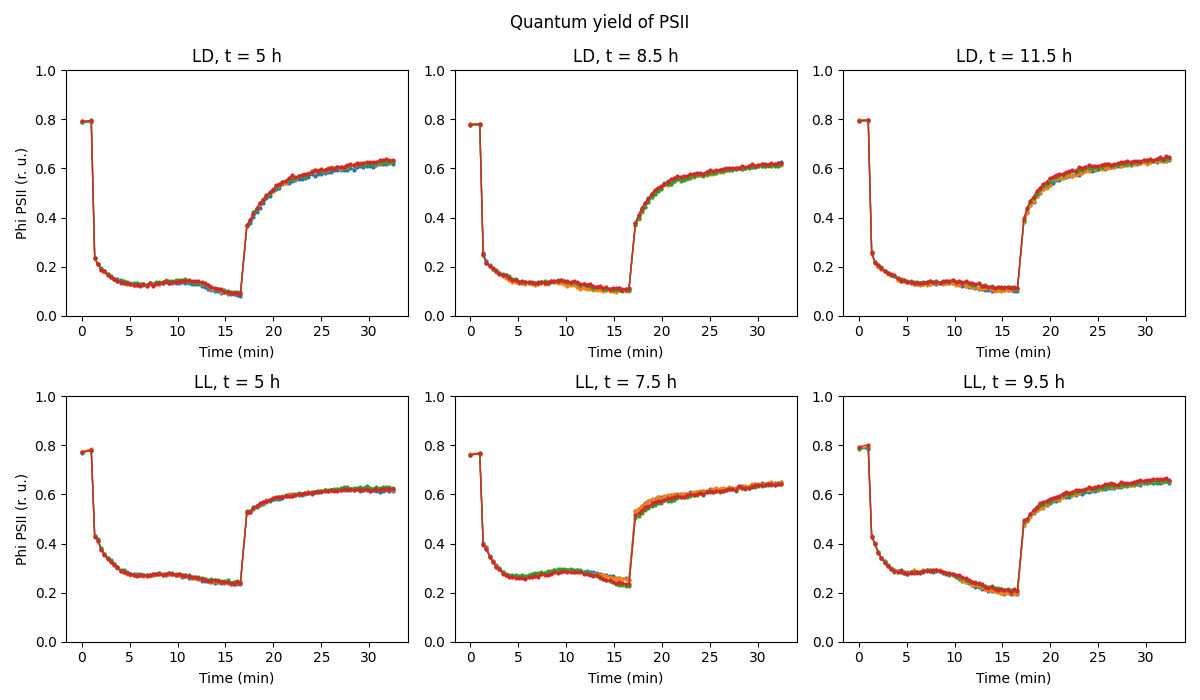

In [9]:
line = 1
markers = 2

fig, ax = plt.subplots(2,3, figsize=(12,7))
fig.suptitle("Quantum yield of PSII")
for i, record in enumerate(manip.annotations.E):
    if manip.annotations.iloc[i].Point == 1:
        ax[0,0].plot(time_Fstat_LD[i], Phi_PSII_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 2:
        ax[0,1].plot(time_Fstat_LD[i], Phi_PSII_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 3:
        ax[0,2].plot(time_Fstat_LD[i], Phi_PSII_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")

for i, ax_ in enumerate(ax[0,:]):
    ax_.set_xlabel("Time (min)")
    ax_.set_title(f"LD, t = {times_LD[i]} h")
    ax_.set_ylim(0,1)
    
ax[0, 0].set_ylabel("Phi PSII (r. u.)")

for i, record in enumerate(manip.annotations.E):
    if manip.annotations.iloc[i].Point == 1:
        ax[1, 0].plot(time_Fstat_LL[i], Phi_PSII_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 2:
        ax[1, 1].plot(time_Fstat_LL[i], Phi_PSII_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 3:
        ax[1, 2].plot(time_Fstat_LL[i], Phi_PSII_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")

for i, ax_ in enumerate(ax[1,:]):
    ax_.set_xlabel("Time (min)")
    ax_.set_title(f"LL, t = {times_LL[i]} h")
    ax_.set_ylim(0,1)
    
ax[1, 0].set_ylabel("Phi PSII (r. u.)")

fig.tight_layout()
fig.savefig(LL.fig_folder + "/Phi_PSII.png", dpi=300)

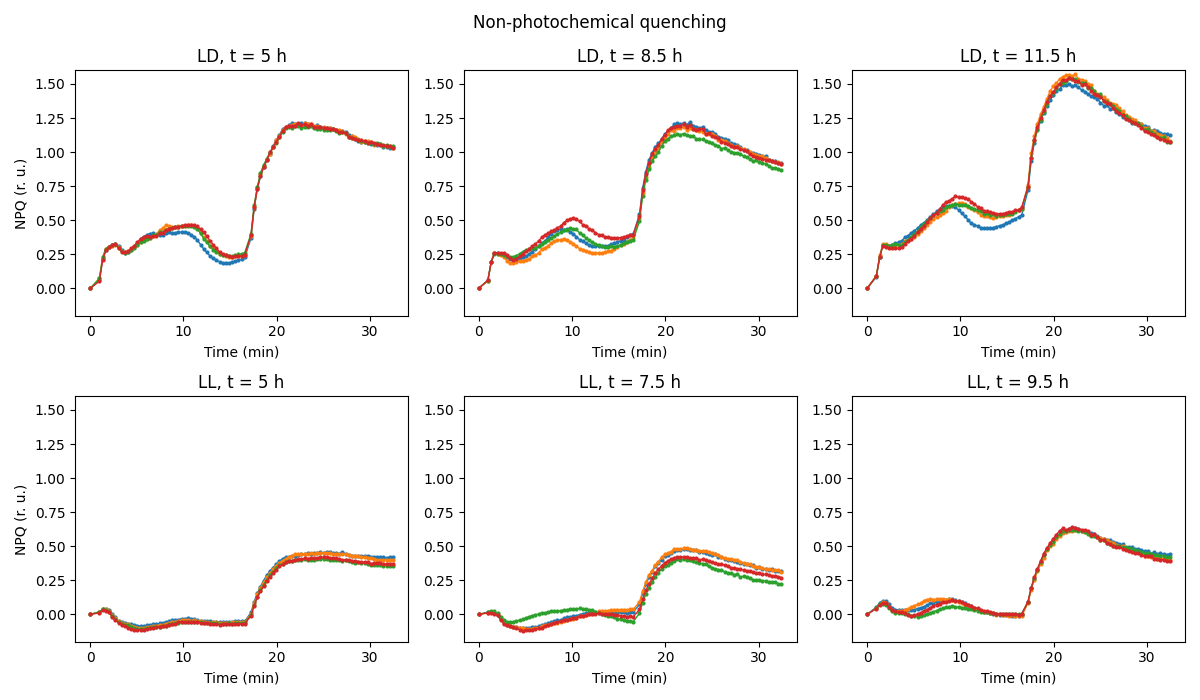

In [10]:
line = 1
markers = 2
ylim = (-0.2, 1.6)

fig, ax = plt.subplots(2,3, figsize=(12,7))
fig.suptitle("Non-photochemical quenching")
for i, record in enumerate(manip.annotations.E):
    if manip.annotations.iloc[i].Point == 1:
        ax[0,0].plot(time_Fstat_LD[i], NPQ_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 2:
        ax[0,1].plot(time_Fstat_LD[i], NPQ_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 3:
        ax[0,2].plot(time_Fstat_LD[i], NPQ_LD[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")

for i, ax_ in enumerate(ax[0,:]):
    ax_.set_xlabel("Time (min)")
    ax_.set_title(f"LD, t = {times_LD[i]} h")
    ax_.set_ylim(ylim)
    
ax[0, 0].set_ylabel("NPQ (r. u.)")

for i, record in enumerate(manip.annotations.E):
    if manip.annotations.iloc[i].Point == 1:
        ax[1, 0].plot(time_Fstat_LL[i], NPQ_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 2:
        ax[1, 1].plot(time_Fstat_LL[i], NPQ_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")
    if manip.annotations.iloc[i].Point == 3:
        ax[1, 2].plot(time_Fstat_LL[i], NPQ_LL[i], 'o-', markersize=markers, linewidth = line, color = f"C{i%4}")

for i, ax_ in enumerate(ax[1,:]):
    ax_.set_xlabel("Time (min)")
    ax_.set_title(f"LL, t = {times_LL[i]} h")
    ax_.set_ylim(ylim)
    
ax[1, 0].set_ylabel("NPQ (r. u.)")

fig.tight_layout()
fig.savefig(LL.fig_folder + "/NPQ.png", dpi=300)